In [26]:
from pycoingecko import CoinGeckoAPI
from pprint import pprint
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt

# Get data from CoinGecko API

Pull the first 5 pages of coin data from the API.

In [186]:
cg = CoinGeckoAPI()

pages = [1, 2, 3, 4, 5]

coins = []
for page in pages:
    results = cg.get_coins_markets("usd", page=page)
    for coin in results:
        coins.append(coin)

In [187]:
stablecoins = ["usd", "eur", "dollar", "magic internet"]

for idx, coin in enumerate(coins):
    for stable in stablecoins:
        if stable in coin["name"].lower():
            coins.pop(idx)

In [188]:
len(coins)

477

In [197]:
df = pd.DataFrame(columns=["Name", "Symbol", "Price", "MarketCap", "FullyDilutedValuation", "Rank", "Volume", "ATHChangePercent"])

for idx, coin in enumerate(coins):
    df.loc[idx] = [coin["name"], coin["symbol"].upper(), coin["current_price"], coin["market_cap"], coin["fully_diluted_valuation"], 
                   coin["market_cap_rank"], coin["total_volume"], coin["ath_change_percentage"]]

df["FullyDilutedValuation"] = df['FullyDilutedValuation'].fillna(df["MarketCap"])
df["FDVtoMCAP_Ratio"] = df["FullyDilutedValuation"] / df["MarketCap"]

$$ D_R = min(FDV/DV), C_P = min(ATH\%Change) $$

$$ R = D_R + C_P $$

In [201]:
df["Rank"] = (df["FDVtoMCAP_Ratio"] * abs(df["ATHChangePercent"]))
df = df[df["Volume"] > 50e6].sort_values("Rank", ascending=True)[:50]
# df = df[df["Rank"] < df[df['Name'] == "Bitcoin"].Rank.values[0]].sort_values("Rank", ascending=True)
# df.reset_index(drop=True, inplace=True)

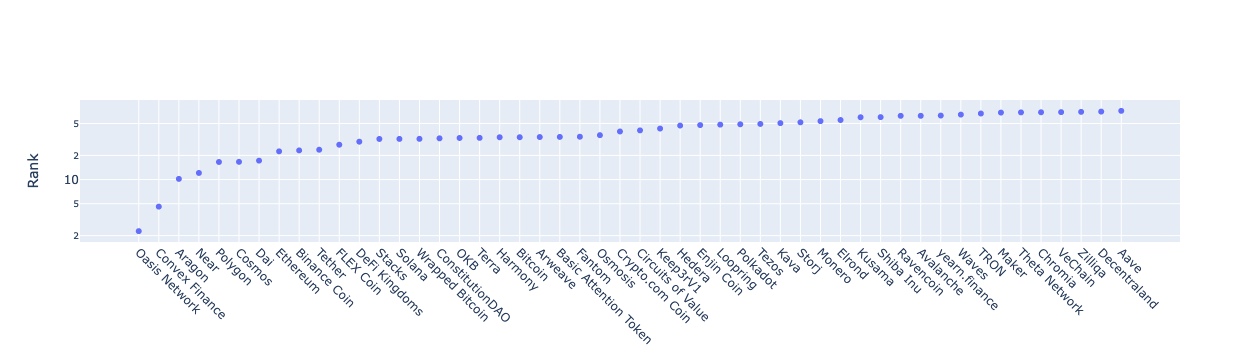

In [203]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.Rank, mode='markers', hoverinfo="x"))

fig.update_yaxes(title_text="Rank", type="log")
fig.update_xaxes(tickangle=45)

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        dtick = 1,
    )
)

In [ ]:
fig = go.Figure()

df1 = df[df.ATHChangePercent > -20]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))
fig.add_hline(
    y=df.iloc[0].ATHChangePercent,
    line_dash="dot",
)
fig.add_hline(
    y=df.iloc[1].ATHChangePercent,
    line_dash="dot",
)
#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
fig = go.Figure()

df1 = df[(df.ATHChangePercent > -20)]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))

#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
df["VolumeMarketCapRatio"] = df["Volume"] / df["MarketCap"]

In [ ]:
df.sort_values("VolumeMarketCapRatio", ascending=False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.Volume, mode='markers'))
fig.add_hline(
    y=df.Volume.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.Volume.median() + df.Volume.std(),
    line_dash="dot",
)

fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.VolumeMarketCapRatio, mode='markers'))
fig.add_hline(
    y=df.VolumeMarketCapRatio.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.VolumeMarketCapRatio.median() + df.VolumeMarketCapRatio.std(),
    line_dash="dot",
)
fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)